This following code implements Granovetter, Mark S. 1978. “Threshold Models of Collective Behavior.” American Journal  of  Sociology  83:1420-1433.

Replication by Chen-Shuo Hong (2017)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy as sp

In [2]:
# Set Parameters for the Distribution of Threshold
mu = 0.5                                 # mean
sigma = 0.15                             # standard deviation 
data = np.random.normal(mu, sigma, 1000) # generate a random sample (N=1000) from normal distribution

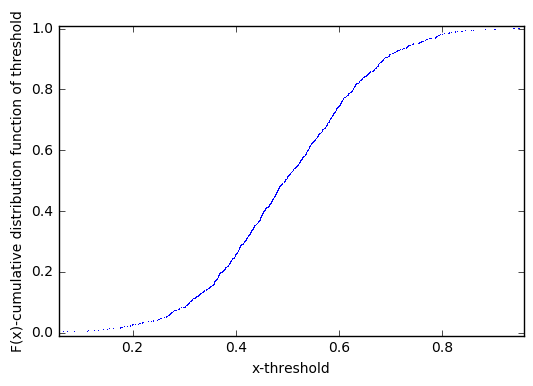

In [3]:
# Draw Empirical Cumulative Distribution Function (ECDF)
x = np.sort(data)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker=',', linestyle='none')
_ = plt.xlabel('x-threshold')
_ = plt.ylabel('F(x)-cumulative distribution function of threshold')
plt.margins(0.01)                        # keep data off plot edges 
plt.show()

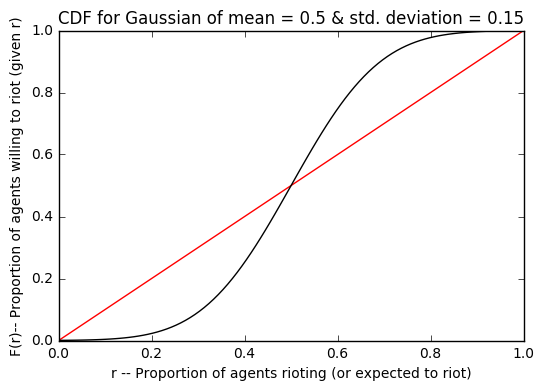

In [4]:
# Draw Gaussian Cumulative Distribution Function
plt.close()
def gaussian_cdf(mu, sigma):
    x = sp.linspace(0, 1, 100)                    # set x-axis by 100 numbers between 0 and 1
    y = stats.norm.cdf(x, loc=mu, scale=sigma)    # CDF with specific mean (loc) and standard deviation (scale)
    _ = plt.plot([0, 1.0], [0, 1.0], 'r-', lw=1)  # plot 45 degree line
    _ = plt.plot(x, y, color='black')             # plot CDF line
    _ = plt.xlabel('r -- Proportion of agents rioting (or expected to riot)')
    _ = plt.ylabel('F(r)-- Proportion of agents willing to riot (given r)')
    _ = plt.title('CDF for Gaussian of mean = {0} & std. deviation = {1}'.format(mu, sigma))
    _ = plt.draw()
plt.show(gaussian_cdf(mu, sigma))

In [5]:
# Set Parameters and Initial Conditions for Cobweb Diagram
mean = mu
std = sigma
maxit = 10                             # specify the number of iterations for the cobweb diagram
init = 0.49                            # specify initial condition for the dynamic model (start of cobweb diagram)

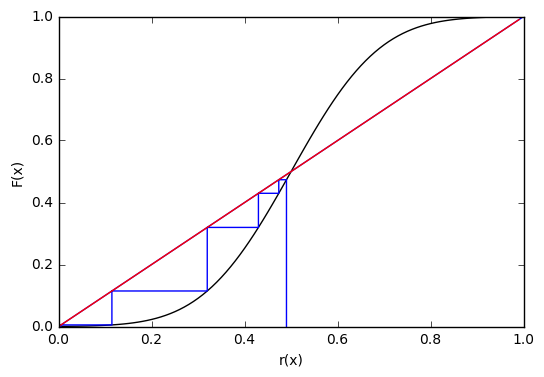

In [6]:
# Create cw_dg function
# create a coordinate plane 
plt.close()
plt.xlabel('r(x)')
plt.ylabel('F(x)')
xmax = 1.0
xmin = 0.0
ymax = 1.0
ymin = 0.0
plt.axis([xmin, xmax, ymin, ymax]) 

# Define CDF
def cdf_func(x, mu, sigma):
    return stats.norm.cdf(x, loc=mu, scale=sigma)

# Plot CDF
xcon = np.arange(xmin, xmax, 0.01) 
ycon = cdf_func(xcon, mu, sigma)       # function computed
plt.plot(xcon, ycon, 'black')          # function plotted black

# cobweb plot: (x, f^1(x)), (f^1(x),f^1(x)), (f^1(x), f^2(x)), (f^2(x),f^2(x)) ... (f^i(x), f^(i+1)(x)),(f^(i+1),f^(i+1)) to i=n
# connect up points n times, this is 2n pairs of points (e.g. (x1, y1)--(x2, y2))
# set initial point at (init, 0)

def cob_dia(init, mu, sigma, n):
    xarray = np.linspace(0.0,1.0,2*n)  # create array for points xvalue 
    yarray = np.linspace(0.0,1.0,2*n)  # create array for points yvalue 
    x = init
    xarray[0] = init                   # specify the initial proportion of agents rioting
    yarray[0] = 0
    for i in range(0, n-1):            # iterate
        xarray[2*i+1] = x              # the following three lines specifics the first point in pairs (x,f(x))
        x = cdf_func(x, mu, sigma)
        yarray[2*i+1] = x
        xarray[2*(i+1)] = x            # the second point in pairs (f(x),f(x))
        yarray[2*(i+1)] = x
    #print(xarray, yarray)
    plt.plot(xarray, yarray, 'b')      # connect up all these points blue

cob_dia(init, mu, sigma, maxit)        # cobweb plot
plt.plot(xcon, xcon, 'r')              # y=x plotted red
plt.show()